In [1]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
sns.set(rc={'figure.figsize':(17.0,27.5)})
sns.set(font_scale=1.25)
results ={}
quantizer = 'ffp162'
keys = ['baseline', 'conv1', 'maxpool1', 'conv2', 'maxpool2', 'dense3', 'dense4']
for key in keys:
    with open ("results_lenet_{0}_{1}.pkl".format(quantizer, key), 'rb') as fp:
        results[key] = pickle.load(fp)

Layer: baseline
Mean accuracy: 0.988425001502037
Mean loss 0.037653799989783326
Mean runtime: 238.764133343735 s

Layer: conv1
Mean accuracy: 0.11349999904632568
Mean loss 2.301032901477814
Mean runtime: 164.43048306027777 s

Layer: maxpool1
Mean accuracy: 0.9873374998569489
Mean loss 0.04238104176554808
Mean runtime: 725.0525330626115 s

Layer: conv2
Mean accuracy: 0.11349999904632568
Mean loss 2.3010315311431886
Mean runtime: 168.3624471342191 s

Layer: maxpool2
Mean accuracy: 0.9884249940514565
Mean loss 0.036270297521464816
Mean runtime: 182.43843829934485 s

Layer: dense3
Mean accuracy: 0.11349999904632568
Mean loss 2.3010397921562196
Mean runtime: 172.30819837944 s

Layer: dense4
Mean accuracy: 0.09799999743700027
Mean loss 2.3025851249694824
Mean runtime: 195.10242629080312 s



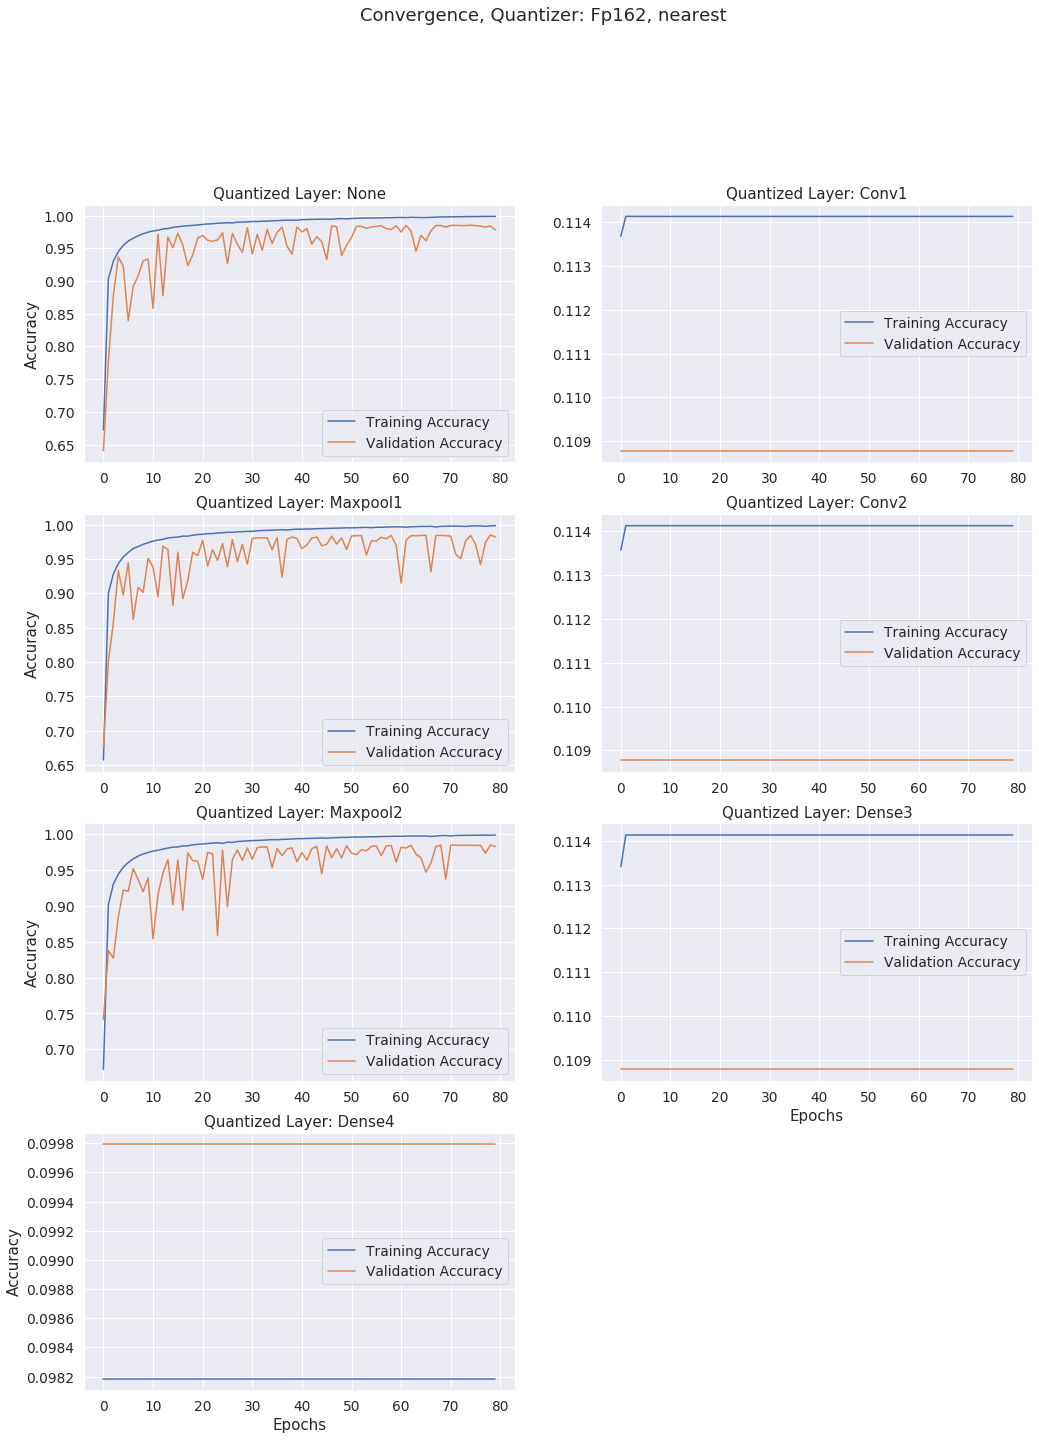

In [2]:
for key in keys:
    print('Layer:',key)
    print('Mean accuracy:',results[key]['eval_trimmed_mean_accuracy'])
    print('Mean loss',results[key]['eval_trimmed_mean_loss'])
    print('Mean runtime:',results[key]['avg_train_trimmed_mean_time'],'s')
    print()
    
plt.figure()
plt.suptitle('Convergence, Quantizer: '+quantizer[1:].capitalize()+', nearest')
gridx = 2
gridy = 5
for i in range(0, len(keys)):
    plt.subplot(int("{0}{1}{2}".format(gridy, gridx, i+1)))
    if keys[i] == 'baseline':
        plt.title('Quantized Layer: None')
    else:
        plt.title('Quantized Layer: '+keys[i].capitalize())
    plt.grid(True)
    if i == 5 or i == 6:
        plt.xlabel('Epochs')
    if i %2==0:
        plt.ylabel('Accuracy')
    plt.plot(results[keys[i]]['avg_train_hist_acc'], label='Training Accuracy')
    plt.plot(results[keys[i]]['avg_train_hist_acc_val'],  label='Validation Accuracy')
    plt.legend()